In [6]:
from sklearn import datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
from math import exp
from math import log
from math import sqrt
import math
import random
x_train,y_train=ds.load_svmlight_file("a9a.txt")#read data
x_train=x_train.toarray()
x_train=np.hstack((x_train,np.ones([np.shape(x_train)[0],1])))#add bis to x
y_train=y_train.reshape(np.shape(y_train)[0],1)
x_test,y_test=ds.load_svmlight_file("a9a_t.txt",n_features=123)#read data
x_test=x_test.toarray()
x_test=np.hstack((x_test,np.ones([np.shape(x_test)[0],1])))#add bis to x
y_test=y_test.reshape(np.shape(y_test)[0],1)

n=np.shape(x_train)[0]#n:number of examples
m=np.shape(x_train)[1]#m:number of features

#loss function
def loss(X,Y,W,C):
    l=0
    n,m=np.shape(X)
    for i in range(n):
        l+=max(0,1-Y[i]*W.T.dot(X[i]))
    l/=n
    l*=C
    l+=(W.T.dot(W)/2)[0][0]
    return l

#gradient function
def gradient(X,Y,W,C):
    g=np.zeros(np.shape(W))
    m,n=np.shape(X)
    M=np.zeros((m,1))
    for i in range(m):
        if 1-Y[i]*(W.T.dot(X[i]))>=0:
            M[i][0]=1
    Y=M*Y
    g=W-C*X.T.dot(Y)
    return g

In [50]:
"""NAG"""
#initialize parameters with zero
W=np.zeros((m,1))
L_NAG=[]
#set hyper_parameter
eta=1e-6
gamma=1e-5
batch=100
C=10

v=0
#begin training
for epoch in range(1500):
    #calculate gradient g from partial samples
    random.seed()
    i=random.randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W-gamma*v,C)
    #update parameter W
    v=gamma*v+eta*g
    W=W-v
    #calculate test loss
    l_test=loss(x_test,y_test,W,C)
    L_NAG.append(l_test)
print('finished training') 

finished training


In [58]:
"""RMSProp"""
#initialize parameters with zero
W=np.zeros((m,1))
L_RMSProp=[]
#set hyper_parameter
eta=1e-4
gamma=0.9
epsilon=1e-6
batch=100
C=10

G=0
#begin training
for epoch in range(1500):
    #calculate gradient g from partial samples
    random.seed()
    i=random.randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
    #update parameter W
    G=gamma*G+(1-gamma)*(g*g)
    W=W-eta/np.sqrt(G+epsilon)*g
    #calculate test loss
    l_test=loss(x_test,y_test,W,C)
    L_RMSProp.append(l_test)
print('finished training') 

finished training


In [60]:
"""AdaDelta"""
#initialize parameters with zero
W=np.zeros((m,1))
L_AdaDelta=[]
#set hyper_parameter
gamma=0.95
epsilon=1e-9
batch=100
C=10

G=0
dt=0
#begin training
for epoch in range(1500):
    #calculate gradient g from partial samples
    random.seed()
    i=random.randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
    #update parameter W
    G=gamma*G+(1-gamma)*g*g
    dw=-np.sqrt(dt+epsilon)/np.sqrt(G+epsilon)*g
    W=W+dw
    dt=gamma*dt+(1-gamma)*dw*dw
    #calculate test loss
    l_test=loss(x_test,y_test,W,C)
    L_AdaDelta.append(l_test)
print('finished training') 

finished training


In [64]:
"""Adam"""
#initialize parameters with zero
W=np.zeros((m,1))
L_Adam=[]
#set hyper_parameter
beta=0.9
gamma=0.9
eta=1e-5
epsilon=1e-9
batch=100
C=10

M=0
#begin training
for epoch in range(1500):
    #calculate gradient g from partial samples
    i=random.randint(0,n-1-batch)
    g=gradient(x_train[i:i+batch].reshape((batch,m)),y_train[i:i+batch].reshape((batch,1)),W,C)
    #update parameter W
    M=beta*M+(1-beta)*g
    G=gamma*G+(1-gamma)*g*g
    alpha=eta*np.sqrt(1-math.pow(gamma,epoch))/(1-beta)
    W=W-alpha*M/np.sqrt(G+epsilon)
    #calculate test loss
    l_test=loss(x_test,y_test,W,C)
    L_Adam.append(l_test)
print('finished training') 

finished training


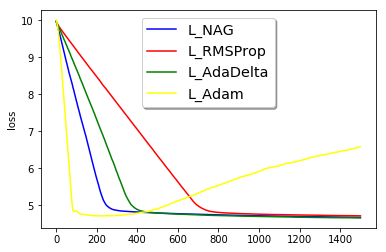

In [65]:
#draw figures
plt.ylabel("loss")
plt.plot(L_NAG,color='blue',label='L_NAG')
plt.plot(L_RMSProp,color='red',label='L_RMSProp')
plt.plot(L_AdaDelta,color='green',label='L_AdaDelta')
plt.plot(L_Adam,color='yellow',label='L_Adam')
plt.legend(loc='upper center',shadow=True,fontsize='x-large')
plt.show()